# Programming example: loading and manipulating images

## Setup

We need to load some libraries, and tell matplotlib how to behave.

In [1]:
import urllib.request
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = [15.0, 10.0]  # default is 6"x4"

We will use urllib to download an image file, cv2 (OpenCV) to open it, and matplotlib ('plt') to show it.  numpy ('np') is handy for doing math.

## Functions

In [2]:
def get_image(url):
    """Download a URL and return it as an OpenCV image."""
    response = urllib.request.urlopen(url)
    image = np.asarray(bytearray(response.read()), dtype="uint8")
    image = cv2.imdecode(image, -1)  # can do cv2.IMREAD_COLOR instead of -1
    return image

In [3]:
def show_image(image):
    """Convert an OpenCV image (BGR) to RGB and show it with matplotlib."""
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

## Download and show an image

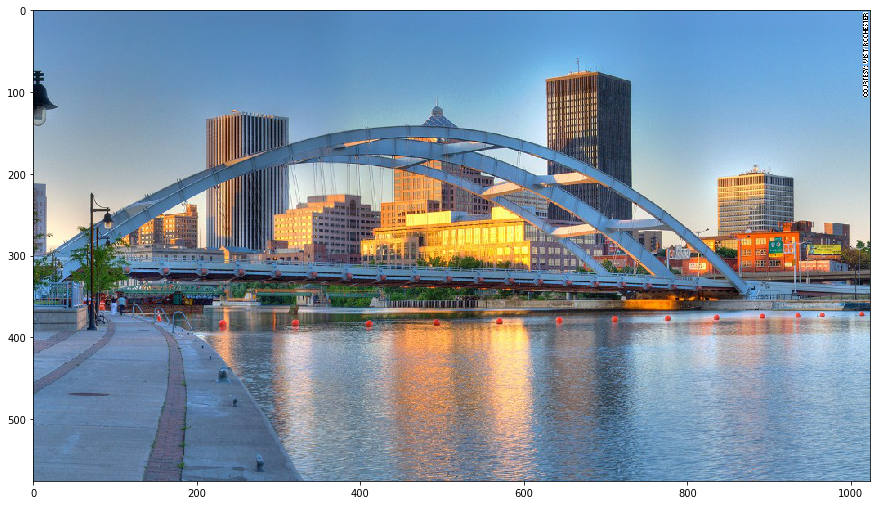

In [4]:
url_of_image = 'http://i2.cdn.turner.com/money/dam/assets/'+\
               '140612123345-least-stressed-cities-rochester-ny-1024x576.jpg'
image = get_image(url_of_image)
show_image(image)

## Mess with the image

First, out of curiosity, let's see how big the image is:

In [5]:
print( image.shape      )  # have OpenCV just tell us
print( len(image)       )  # or check rows, 
print( len(image[0])    )  # columns,
print( len(image[0][0]) )  # channels on our own

(576, 1024, 3)
576
1024
3


Get rid of all the blue:

In [6]:
noblue_image = image.copy()  # make a copy, so we don't mess up the original
for row in noblue_image:
    for pixel in row:
        pixel[0] = 0  # pixel[0] is blue, pixel[1] is green, pixel[2] is red

Show it:

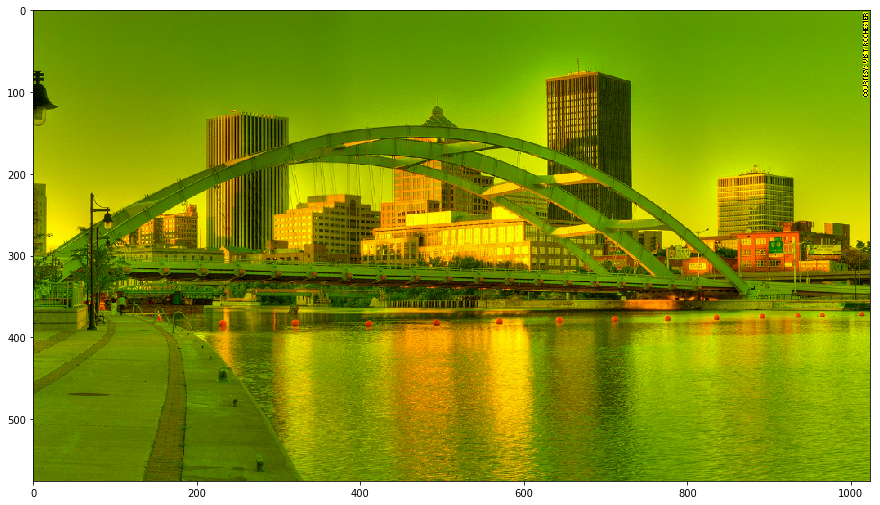

In [7]:
show_image(noblue_image)